# Recap: Boosting 

### General idea: build a model gradually, each time improving *the model so far*

### For each iteration $t$, define a modified $Y^{(t)}$ vector, capturing what is still unexplained by model $F^{(t-1)}$

### Then fit a model $\hat{f}_t$ to $Y^{(t)},$ and update $F^{(t)} = F^{(t-1)} + \epsilon  \hat{f}_t$

### Gradient boosting: improvement is captured by making $Y^{(t)}$ the gradient of the loss function, evaluated at current model $F^{(t-1)}$

### AdaBoost: boosting approach that defines $Y^{(t)}$, $\hat{f}_t$ and $\epsilon$ differently

### Can describe AdaBoost as gradient boosting approach with complex loss function (beyond our material)




# Recap: Artifical (Feed Forward) Neural Nets

### Exist for many decades, "emulate the brain"

### Directed graphical model:
1. Starting from the input layer with $p$ nodes for data $x \in \mathbb R^p$, 
2. Going through hidden layer(s) with non-linear transformation(s)
3. Ending in output layer giving $\hat{f}(x)$

### Every node in each layer connected to all nodes in next layer

### Parameters are weights on edges

### Learning the weights: gradient descent via back-propagation (chain rule)

### Popular approach: stochastic gradient descent (SGD), consider one or a few observations and update the weights

# From Neural Nets to Deep Learning


### Increase in data sizes and computing power: Millions of observations, billions of parameters


### New architerctures, beyond simple fully-connected feed-forward networks: 
1. Convolutional NNs for images (we will discuss)
2. Recurrent NNs
3. GANS

### Range of problems: 
1. Reinforcement learning: learning to play games, the "reward" is only observed at the end
2. Auto-encoding: find structure in data (non-linear PCA)
3. Transfer learning: Learn networks on problems where you have lots of data, adjust to problems with a little data


# From Neural Nets to Deep Learning (ctd.)

### Modern statistical ideas:
1. Dropout: occasionally zero some of the weights in the network to **get out of local minimum**
2. Momentum: Instead of just using the gradient (first derivative) remember previous gradients (sort-of second derivative)

### Starting around 2005: amazing accuracy gains in many domains from using DL models

### Fields dominated by DL today: image recognition, speech recognition, natural language preocessing,...

# Convolutional Neural Nets: the DL revolution in images

### Motivating xample: [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

### An image is a $K\times K \times L$ object (in our EBay example $K=100, L=3$ layers). For simplicity assume here one layer $L=1$. 

### Denote an image by $A$, the $i,j$ pixel is $A(i,j)$

### A *local  area* in the image is a $q\times q$ object (say $q=3$ or $q=5$)



# Filters as detectors

### A *filter* $f$ is a $q\times q$   *mask* $f(k,l),\;k,l=1,\ldots q$

### Now $f$ can be applied to every $q \times q$ area in $A$: 

$$(f*A)(i,j) = \sum_{k=1}^q \sum_{l=1}^q f(k,l)\times A(i+k,j+l)$$

### Gives a new "image" of size $(K-q+1) \times (K-q+1)$, where each pixel is a *convolution* of a neighborhood with the filter

# Filter example: finding a corner or a line

### Consider the following two $3\times 3$ filters: 

$$ f_1 = \left( \begin{array}{ccc} 0 & 0 & 0 \\
1 & 1 & 0\\
0 & 1 & 0 \end{array} \right)\;,\;\;f_2 = \left( \begin{array}{ccc} 0 & 1 & 0 \\
0 & 1 & 0\\
0 & 1 & 0 \end{array} \right)$$

### $(f_1*A)$ gives high values where $A$ has a corner 

### $(f_2*A)$ gives high values where $A$ has a vertical line

### Example: [Sobel filter finds edges](https://en.wikipedia.org/wiki/Sobel_operator)


# Convolutional NN (CNN): main ideas 


### Filters can find "features" in the image that can help identify it: 
* A house has corners
* A snake has a repeating pattern on its back
* A cat has pointy ears 

### But we don't know what features will allow us to solve a specific problem:
* Corners, lines, edges, patterns?
* What scale? A small cat has small pointy ears, a big cat has LARGE pointy ears --- they are both cats

### So, we want the model to "learn" filters of different types and different scales that will help it solve the specific problem

# A CNN architecture

### We don't decide on filters, we "learn" them: a $q\times q$ filter has $q^2$ parameters

### Each filter is applied to the entire image to create a new "image"

### Images are scaled ("pooling"), then more filters are applied, to find features at different scales

### The learned features are then used in a dense feed-forward network to classify images

[Example](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)


# Some details

### Number of parameters of convolutional layers is relatively small

### Pooling: decreasing image size from $K\times K$ usually to $K/2 \times K/2$ by aggregating every $2\times 2$ region to a single pixel

### Most common pooling operator: max pooling (are there pointy ears anywhere in this region?)

### By alternating convolutions and pooling we learn features at different scales

### Important: all parameters (filters, dense layers weights,...) are learned *together* using SGD

# [Example: South Park vs Simpsons](http://giorasimchoni.com/2017/06/11/2017-06-11-deep-south-springfield/)

# Predictive modeling summary and a bit of theory

# What we have learned

### Want to model and predict $y$ as function of $x$: regression or classification

### Using training data $Tr$ to learn model, test data $Te$ to evaluate model and emulate actual prediction

### Traditional parametric models: OLS regression, logistic regression

### Non-parametric models based on neighborhoods: Nearest neighbors, trees

### Modern methods based on trees: Random Forest and Boosting

### Neural nets and DL

# Model complexity or flexibility


### Many of the models we have learned have a *complexity* parameter
* OLS/logistic: $p$, number of variables in $x$
* k-NN: number of neighbors $k$
* Trees: depth of tree $d$
* Neural nets: number of edges in $W$

### More complex models are more flexible and "rich"

### Typical behavior we have seen: as complexity increases, training error decreases, test/prediction error has U-shape ([Illustration](https://en.wikipedia.org/wiki/Overfitting#/media/File:Overfitting_svg.svg))

### Optimal complexity: flexible enough to capture relevant information, not too flexible to cause overfitting



# Intuition: Estimation and approximation error

### Approximation error: how well our model can capture the "true" dependence of $y$ on $x$

### Estimation error: how well can we estimate our model from our training data $Tr$

### Simple (low-complexity) model: high approximation error, low estimation error

### Complex model: low approximation error, high estimation error 

[Graphical illustration](https://archive.cnx.org/contents/b9962572-7ed1-486a-9028-f4d14dc042d8@2/introduction-to-complexity-regularization)

# Squared error decomposition

### For regression, take the standard model: $y = f(x) + \epsilon\;,\;\epsilon \sim (0,\sigma^2)$

### Modeling approach (e.g. OLS),  given training data $Tr$, gives model $\hat{f}(x)$

### Assume want to predict at $x_0$, and understand our expected (squared) prediction error: 

$ \mathbb E(y_0  - \hat{f}(x_0))^2 = \mathbb E \left( \underbrace{\left(y_0  - f(x_0)\right)}_{A} + \underbrace{\left(f(x_0) - \mathbb E (\hat{f}(x_0))\right)}_{B} + \underbrace{\left(\mathbb E (\hat{f}(x_0)) - \hat{f}(x_0)\right)}_{C}\right)^2 $

### Note we treat both the traininfg data $Tr$ (and hence $\hat{f}$) and the response $y_0$ as random variables in our expectations

# The bias-variance decomposition

$ \mathbb E(y_0  - \hat{f}(x_0))^2 =$<br>
$\;\;\;\;\;\;\mathbb E \left( \underbrace{\left(y_0  - f(x_0)\right)}_{A} + \underbrace{\left(f(x_0) - \mathbb E (\hat{f}(x_0))\right)}_{B} + \underbrace{\left(\mathbb E (\hat{f}(x_0)) - \hat{f}(x_0)\right)}_{C}\right)^2 =$<br>
$\;\;\;\;\;\;\mathbb E A^2 + \mathbb E B^2 + \mathbb E C^2 + 2 \mathbb E (AB) + 2 \mathbb E (AC) + 2\mathbb E (BC)$<br><br>

$\mathbb E(A^2) = \sigma^2$ the *Irreducible error* a perfect model which knows the true $f$ would make

$\mathbb E(B^2) =  \mathbb E  \left(f(x_0) - \mathbb E (\hat{f}(x_0))\right)^2 $ is the *squared  bias* --- a measure of approximation error

$\mathbb E(C^2) =  \mathbb E  \left(\mathbb E (\hat{f}(x_0)) - \hat{f}(x_0) \right)^2 $ is the *variance* of the prediction --- a measure of approximation error

$\mathbb E (AB) =  \mathbb E (AC)  = \mathbb E (BC) = 0$ due to independence relations

# Using the bias-variance decomposition

### Our general intuition: as complexity increases, approximation error decreases and estimation error increases 

### For many models we can calculate and show these effects on the bias and variance of the model 

### For example, for OLS regression, we can prove: 
1. That the squared bias decreases when we add more variables into the model
2. That the variance of prediction increases when we add more variables (and calculate it, under some assumptions)

### Similarly for k-NN regression the squared bias decreases and the variance increases as we decrease $k$ (fewer neighbors, more flexibility/complexity)



# Simulation example: bias, variance and prediction error

### Let's generate data according to the following model: $x \in \mathbb R^{20}$ has multivariate normal distribution, $y = \sum_{j=1}^p \sqrt{(21-j)/2} \times x_j + \epsilon\;,\;\epsilon \sim N(0,10)$ 

### So the true model is in fact linear with  $\beta = (\sqrt{10},\sqrt{9.5},...,\sqrt{0.5})^t$

### We have $n=50$ training observations, and want to predict at $x_0 = (1,1,...,1)^t\; \Rightarrow\; y_0 = 43.6 + \epsilon$

### By generating many training sets and $\hat{f}$'s we can evaluate bias, variance and prediction error

### Complexity parameter: number of variables included in the model (only the first coordinate, first two,...)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [71]:
ntr=50
p=20
err_var=1000

yhat_0 = np.zeros( (20, 1000) )
err = np.zeros( (20, 1000) )
beta = np.sqrt(np.array(range(20,0,-1))/2)
for iteration in range(1000):
    X = np.random.normal(loc=0.0, scale=1.0, size=(ntr,p))
    Y = X@beta + np.random.normal(loc=0.0, scale=np.sqrt(err_var), size=ntr)
    f0 = np.sum(beta) 
    for pnow in range(1,p+1):
        betahat = np.linalg.inv(X[:,:pnow].transpose()@ X[:,:pnow])@X[:,:pnow].transpose()@Y
        yhat_0[pnow-1,iteration] = np.sum(betahat)
        err[pnow-1,iteration] = f0-np.sum(betahat)
        
pred_err = np.mean(err**2,axis=1)+err_var
pred_var = np.var(yhat_0,axis=1)
pred_bias2 = (np.mean(yhat_0,axis=1)-np.sum(beta))**2

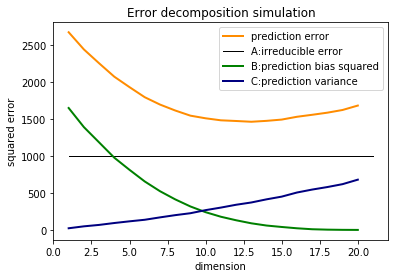

In [72]:
plt.figure()
lw = 2
plt.plot(range(1,p+1), pred_err, color='darkorange', lw=lw, label='prediction error' )
plt.plot([1,p+1], [err_var,err_var], color='black', lw=1, label='A:irreducible error')
plt.plot(range(1,p+1), pred_bias2, color='green', lw=lw, label='B:prediction bias squared')
plt.plot(range(1,p+1), pred_var, color='navy', lw=lw, label='C:prediction variance')
plt.xlabel('dimension')
plt.ylabel('squared error')
plt.title('Error decomposition simulation')
plt.legend(loc="upper right")
plt.show() 

# Cross validation: beyond the test set

### So far we simply divided our data to 80% training and 20% test

### We mentioned that if we also have to choose a model parameter (like number of variables or $k$ in $k$-NN), we should have training-validation-test (usually 60-20-20), where we use validation to select model, and test for final evaluation

### But there are more efficient ways to use the data

### Example: 10-fold cross validation
1. Divide the data into 10 equal size parts (folds)
2. Repeat 10 times: 
    a. Fit the model on 90% of the data 
    b. Apply the model to the holdout fold
3. Evaluate the modeling approach on 100% of the data by combining the holdout folds


# Cross validation: advantages and issues

### Can go beyond 10-fold, to n-fold: each time fit the model on $n-1$ observations, and hold-out $1$

### Advantages: 
1. Training set is bigger ($0.9n$ or $n-1$ instead of $0.8n$) --- better models and more realistic
2. Test set is bigger (essentially of size $n$) --- more stable

### Disadvantages: 
1. Have to build 10 (or $n$) models --- much more computing
2. What exactly are we evaluating --- we don't have a single model

### Lots of interesting perspectives and results


# Regularization: controlling the bias-variance tradeoff

### As we saw, in OLS, the more variables in the model, the bigger the prediction variance

### This is because we have to estimate many parameters, high model complexity

### Regularization controls model complexity not by reducing the number of parameters, but in other ways

### Most common: restrict the norm of $\hat{\beta}$, instead of allowing it to take any value in $\mathbb R^p$

### Example: ridge regression, $\hat{\beta}$ is the solution of: 

$$ \min_{\|\beta\|\leq c} RSS (\beta)$$


In [75]:
ntr=50
p=20
err_var=1000

yhat_0 = np.zeros( (30, 1000) )
err = np.zeros( (30, 1000) )
beta = np.sqrt(np.array(range(20,0,-1))/2)
for iteration in range(1000):
    X = np.random.normal(loc=0.0, scale=1.0, size=(ntr,p))
    Y = X@beta + np.random.normal(loc=0.0, scale=np.sqrt(err_var), size=ntr)
    f0 = np.sum(beta) 
    for lamb in range(0,30):
        betahat = np.linalg.inv(X.transpose()@ X+lamb*np.identity(p))@X.transpose()@Y
        yhat_0[lamb,iteration] = np.sum(betahat)
        err[lamb,iteration] = f0-np.sum(betahat)
        
pred_err = np.mean(err**2,axis=1)+err_var
pred_var = np.var(yhat_0,axis=1)
pred_bias2 = (np.mean(yhat_0,axis=1)-np.sum(beta))**2

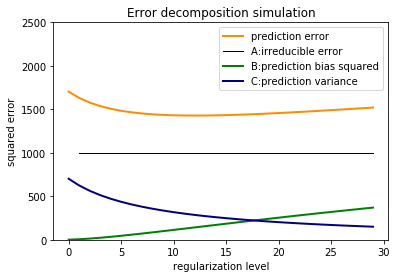

In [77]:
plt.figure()
lw = 2
plt.plot(range(0,30), pred_err, color='darkorange', lw=lw, label='prediction error' )
plt.plot([1,29], [err_var,err_var], color='black', lw=1, label='A:irreducible error')
plt.plot(range(0,30), pred_bias2, color='green', lw=lw, label='B:prediction bias squared')
plt.plot(range(0,30), pred_var, color='navy', lw=lw, label='C:prediction variance')
plt.ylim([0,2500])
plt.xlabel('regularization level')
plt.ylabel('squared error')
plt.title('Error decomposition simulation')
plt.legend(loc="upper right")
plt.show() 